In [65]:
# Week2 Assignment
# first load .csv files 
import pandas as pd 
from scipy.stats import chisquare
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np
cabData = pd.read_csv("Cab_Data.csv") 
cabData = cabData.drop_duplicates(subset=["Transaction ID"], keep='first')
cabData = cabData.dropna()

custData = pd.read_csv("Customer_ID.csv") 
custData = custData.drop_duplicates(subset=["Customer ID"], keep='first')
custData = custData.dropna()

transData = pd.read_csv("Transaction_ID.csv") 
transData = transData.drop_duplicates(subset=["Transaction ID"], keep='first')
transData = transData.dropna()

In [24]:
# First Step: descriptive analysis on cab ride data
cabData['Profit'] = cabData['Price Charged'] - cabData['Cost of Trip']
cabData['Profit per KM'] = cabData['Profit'] / cabData['KM Travelled']
cabData['Profit Percentage'] = cabData['Profit'] / cabData['Cost of Trip']
pinkCab = cabData[cabData['Company'] == 'Pink Cab']
yellowCab = cabData[cabData['Company'] == 'Yellow Cab']
company = ['Pink','Yellow']

totalProfit = dict(zip(company,[df['Profit'].sum() for df in [pinkCab,yellowCab]]))
totalRide = dict(zip(company,[len(df.index) for df in [pinkCab,yellowCab]]))
totalKM = dict(zip(company,[df['KM Travelled'].sum() for df in [pinkCab,yellowCab]]))
profPerRide = {company[i]: (list(totalProfit.values())[i] / list(totalRide.values())[i]) for i in range(len(company))}
profPerKM = {company[i]: (list(totalProfit.values())[i] / list(totalKM.values())[i]) for i in range(len(company))}
meanProfPerc =  dict(zip(company,[df['Profit Percentage'].mean() for df in [pinkCab,yellowCab]]))

## add city categories

Gender      Female    Male     All
Company                           
Pink Cab     37480   47231   84711
Yellow Cab  116000  158681  274681
All         153480  205912  359392


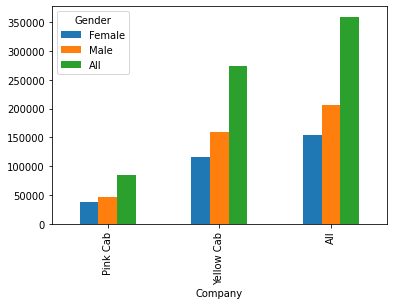

In [37]:
# Second Step: descriptive analysis on customer data and merge with cabData according to transaction ID and customer ID
# then drop the 'Customer ID' feature since it has no indication anymore
from codecs import getencoder


transCusID = pd.merge(transData, custData, on='Customer ID', how='inner')
rideCustomer = pd.merge(cabData,transCusID, on='Transaction ID', how='inner')
rideCustomer = rideCustomer.drop(columns=['Customer ID'])
pinkCab = rideCustomer[rideCustomer['Company'] == 'Pink Cab']
yellowCab = rideCustomer[rideCustomer['Company'] == 'Yellow Cab']

femaleRiders = rideCustomer[rideCustomer['Gender'] == 'Female']
maleRiders = rideCustomer[rideCustomer['Gender'] == 'Male']
groupGender = rideCustomer.groupby(['Company', 'Gender']).size()

# print(pinkCab["Gender"].value_counts(normalize=True))
# print(yellowCab["Gender"].value_counts(normalize=True))
# print(femaleRiders["Company"].value_counts(normalize=True))
# print(maleRiders["Company"].value_counts(normalize=True))

# create a contingency table with features of Gender and Company
table_CompGend = pd.crosstab(index=rideCustomer['Company'], columns=rideCustomer['Gender'], margins=True)
print(table_CompGend)
barplot = table_CompGend.plot.bar()

In [77]:
# Correlation test between Gender and Company
# First, compute the expected distribution, assuming that H0 (the null hypothesis) holds
gender = ['female','male']
genderPerc = dict(zip(gender,[(len(df.index)/len(rideCustomer.index)) for df in [femaleRiders,maleRiders]]))
companyPerc = dict(zip(company,[(len(df.index)/len(rideCustomer.index)) for df in [pinkCab,yellowCab]]))
femalePerc, malePerc = [list(genderPerc.values())[i] for i in range(len(genderPerc))]
pinkPerc, yellowPerc = [list(companyPerc.values())[i] for i in range(len(companyPerc))]
H0_compgend = pd.DataFrame(np.array([[pinkPerc*femalePerc, pinkPerc*malePerc], 
                             [yellowPerc*femalePerc, yellowPerc*malePerc]]), columns=['female', 'male'], index=['pink','yellow'])
H0_compgend = H0_compgend*len(rideCustomer.index)

H1_array = np.ravel(pd.DataFrame(table_CompGend).to_numpy()[:2,:2])
H0_array = np.ravel(pd.DataFrame(H0_compgend).to_numpy())
chi2,pvalue = chisquare(H1_array,f_exp = H0_array)
if pvalue < 0.05: print('The null hypothesis is rejected')




The null hypothesis is rejected
